#1. Importing libraries and loading data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2, RFECV


# 2. Dataset

In [ ]:
# Define column names
column_names = [f'feature_{i}' for i in range(1, 58)] + ['label']

# Load the dataset
data = pd.read_csv("/content/spambase.data", header=None, names=column_names)

# Display basic information about the dataset
print("=== Dataset Information ===")
print(f"Shape of the dataset: {data.shape}")
print(f"Missing values: {data.isnull().sum().sum()}")

# Class distribution
print("\n=== Class Distribution ===")
print(data['label'].value_counts())

# Summary statistics
print("\n=== Summary Statistics ===")
print(data.describe())

=== Dataset Information ===
Shape of the dataset: (4601, 58)
Missing values: 0

=== Class Distribution ===
label
0    2788
1    1813
Name: count, dtype: int64

=== Summary Statistics ===
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000

# 3. Charts

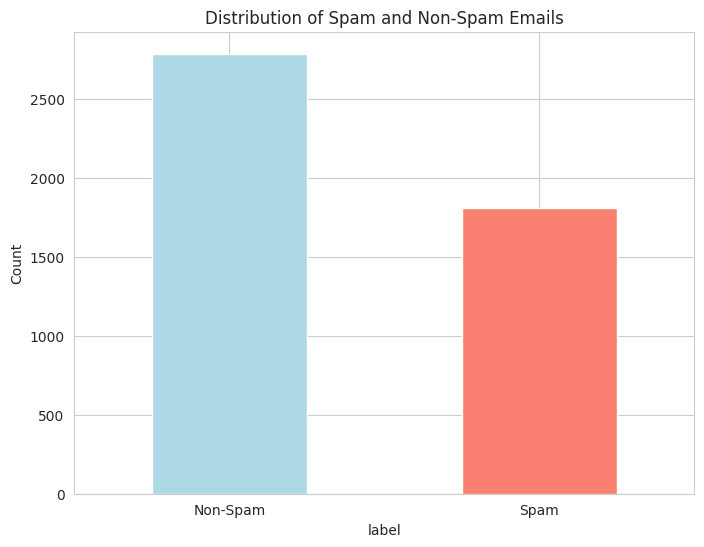

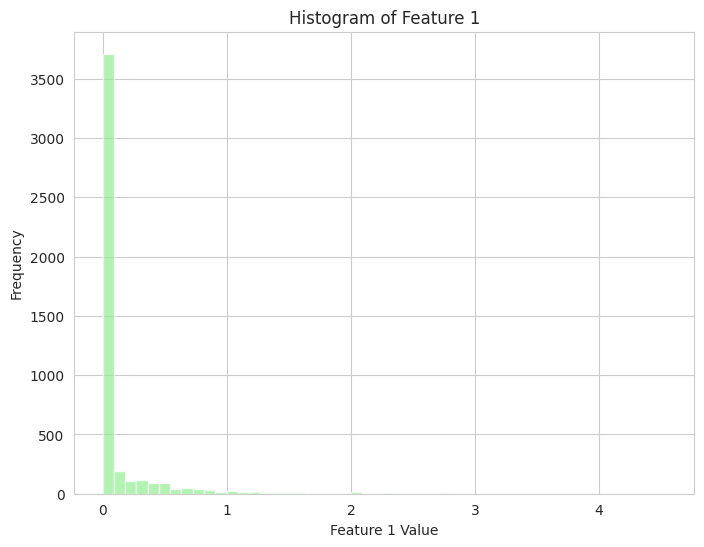

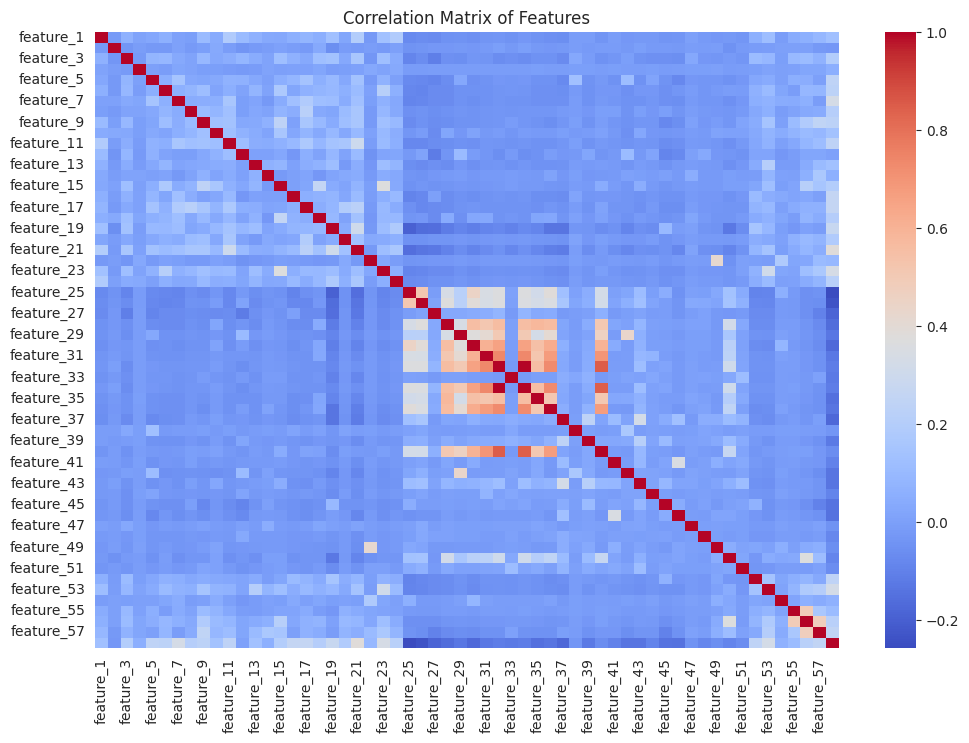

<ipython-input-47-6e714a504cea>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='label', y='feature_1', palette=['lightblue', 'salmon'])


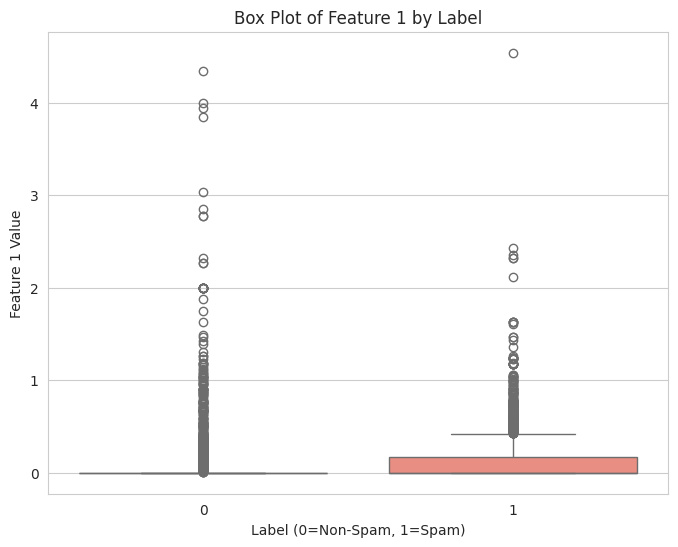

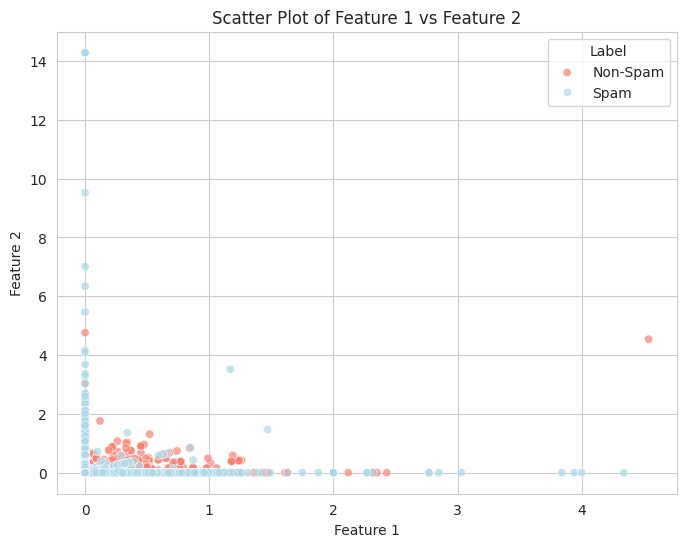

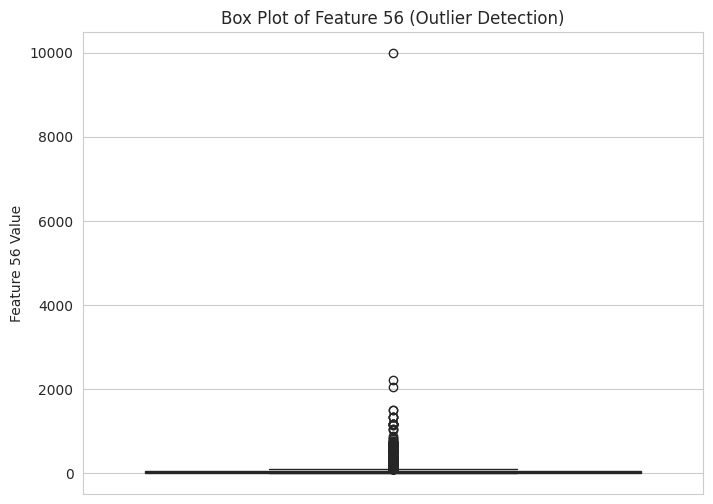

In [ ]:
# 1. Bar chart: Distribution of spam and non-spam emails
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['Non-Spam', 'Spam'], rotation=0)
plt.ylabel('Count')
plt.show()

# 2. Histogram: Distribution of a selected feature (e.g., Feature 1)
plt.figure(figsize=(8, 6))
data['feature_1'].plot(kind='hist', bins=50, color='lightgreen', alpha=0.7)
plt.title('Histogram of Feature 1')
plt.xlabel('Feature 1 Value')
plt.ylabel('Frequency')
plt.show()

# 3. Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

# 4. Box plot: Distribution of Feature 1 by label (spam vs non-spam)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='label', y='feature_1', palette=['lightblue', 'salmon'])
plt.title('Box Plot of Feature 1 by Label')
plt.xlabel('Label (0=Non-Spam, 1=Spam)')
plt.ylabel('Feature 1 Value')
plt.show()

# 5. Scatter plot: Feature 1 vs Feature 2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='feature_1', y='feature_2', hue='label', palette=['lightblue', 'salmon'], alpha=0.7)
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Label', labels=['Non-Spam', 'Spam'])
plt.show()

# 6. Outlier detection: Identifying extreme values in Feature 56
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='feature_56', color='purple')
plt.title('Box Plot of Feature 56 (Outlier Detection)')
plt.ylabel('Feature 56 Value')
plt.show()


#4. Matrix

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 10}


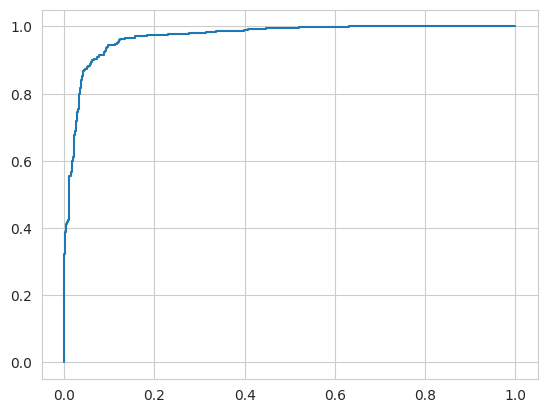

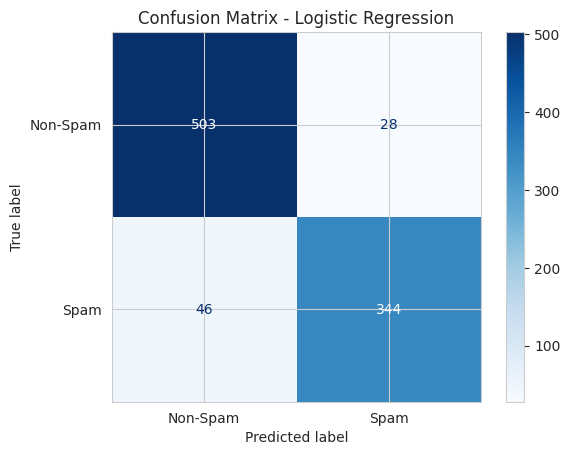

Tuning SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


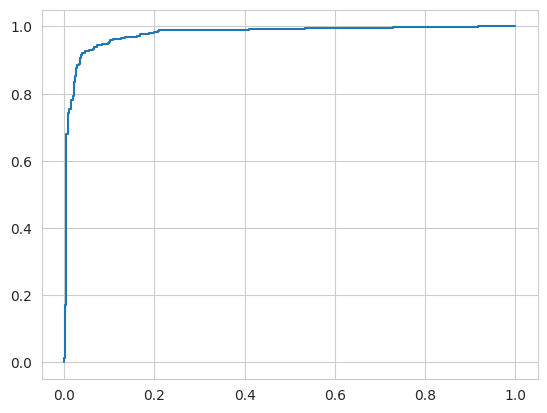

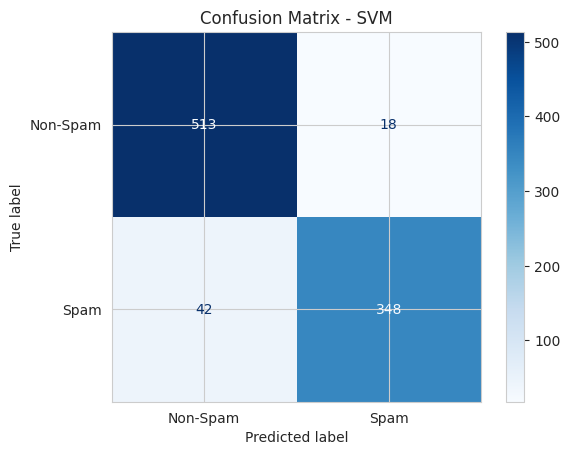

Tuning Linear SVM (for feature selection)...
Selected features for SVM: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49
 51 52 53 54 55 56]
Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}


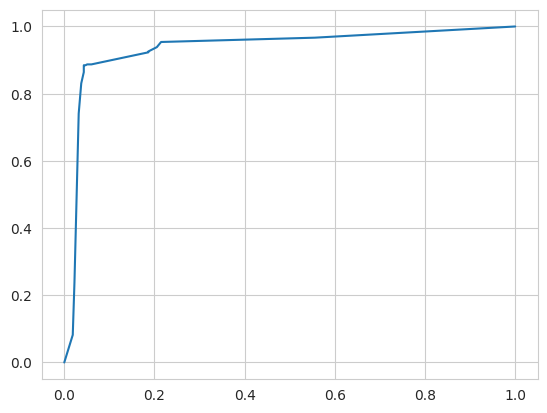

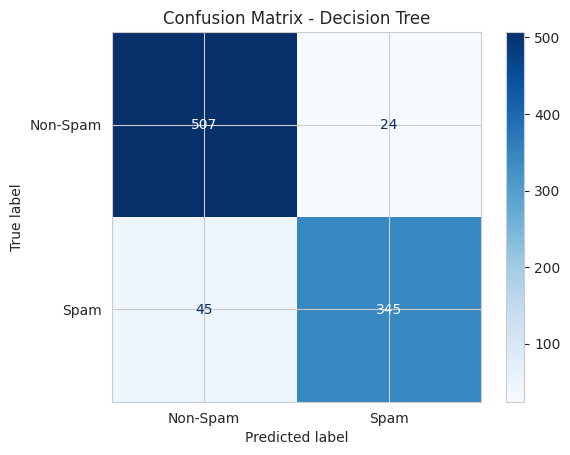

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


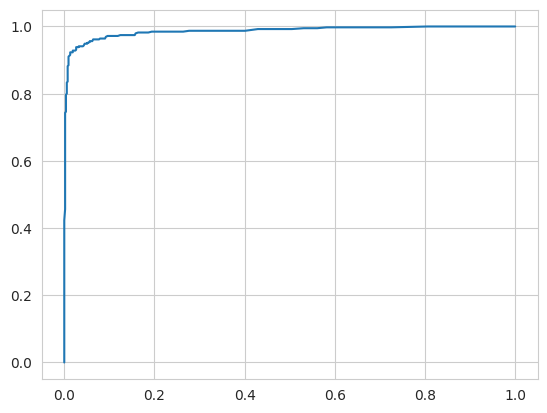

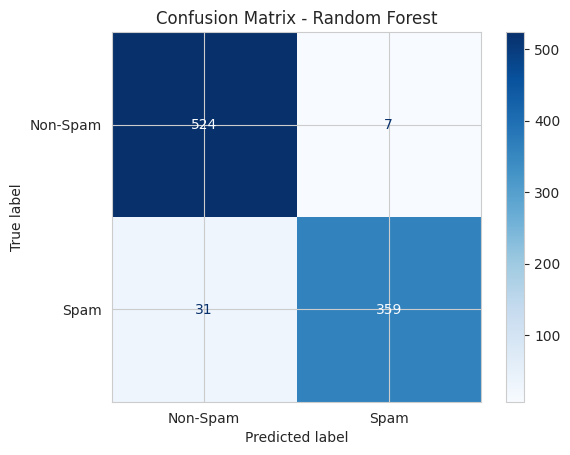

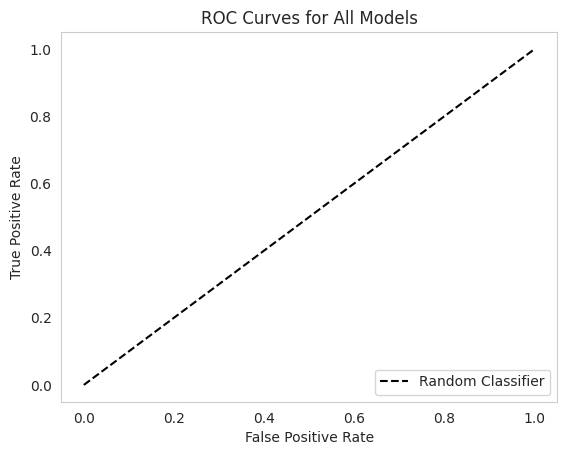

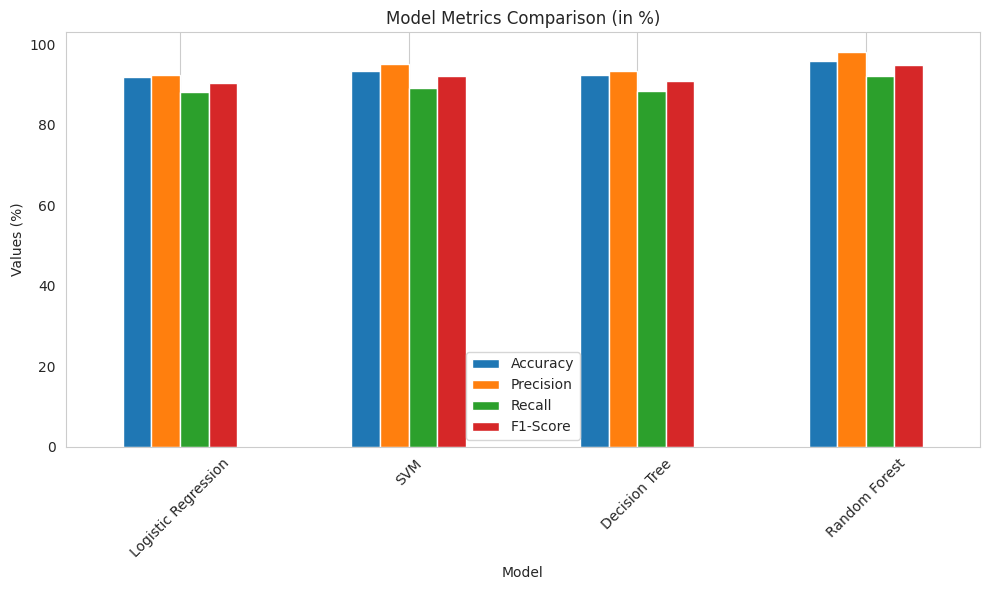

=== Logistic Regression ===
ROC AUC: 97.04%
Classification Report:
              precision    recall  f1-score     support
Non-Spam       0.916211  0.947269  0.931481  531.000000
Spam           0.924731  0.882051  0.902887  390.000000
accuracy       0.919653  0.919653  0.919653    0.919653
macro avg      0.920471  0.914660  0.917184  921.000000
weighted avg   0.919819  0.919653  0.919373  921.000000


=== SVM ===
ROC AUC: 97.85%
Classification Report:
              precision    recall  f1-score     support
Non-Spam       0.924324  0.966102  0.944751  531.000000
Spam           0.950820  0.892308  0.920635  390.000000
accuracy       0.934853  0.934853  0.934853    0.934853
macro avg      0.937572  0.929205  0.932693  921.000000
weighted avg   0.935544  0.934853  0.934539  921.000000


=== Decision Tree ===
ROC AUC: 93.53%
Classification Report:
              precision    recall  f1-score     support
Non-Spam       0.918478  0.954802  0.936288  531.000000
Spam           0.934959  0.884615

In [ ]:
column_names = [f'feature_{i}' for i in range(1, 58)] + ['label']
data = pd.read_csv('spambase.data', names=column_names)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Linear SVM (for feature selection)": LinearSVC(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

final_results = {}
selected_features = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    if model_name == "Linear SVM (for feature selection)":
        # Selekcja cech z LinearSVC
        selector = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
        selector.fit(X_train, y_train)
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
        selected_features["SVM"] = np.where(selector.support_)[0]
        print(f"Selected features for SVM: {selected_features['SVM']}")
        continue

    if model_name == "SVM" and "SVM" in selected_features:
        X_train_selected = X_train[:, selected_features["SVM"]]
        X_test_selected = X_test[:, selected_features["SVM"]]
    else:
        X_train_selected = X_train
        X_test_selected = X_test

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    y_pred = best_model.predict(X_test_selected)
    y_probs = (
        best_model.predict_proba(X_test_selected)[:, 1]
        if hasattr(best_model, "predict_proba")
        else best_model.decision_function(X_test_selected)
    )
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    final_results[model_name] = {
        "classification_report": classification_report(y_test, y_pred, target_names=["Non-Spam", "Spam"], output_dict=True),
        "roc_auc": roc_auc,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc * 100:.2f}%)")
    disp = ConfusionMatrixDisplay(confusion_matrix=final_results[model_name]["confusion_matrix"],
                                   display_labels=["Non-Spam", "Spam"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

metrics_data = {
    "Model": list(final_results.keys()),
    "Accuracy": [results['classification_report']['accuracy'] * 100 for results in final_results.values()],
    "Precision": [results['classification_report']['Spam']['precision'] * 100 for results in final_results.values()],
    "Recall": [results['classification_report']['Spam']['recall'] * 100 for results in final_results.values()],
    "F1-Score": [results['classification_report']['Spam']['f1-score'] * 100 for results in final_results.values()]
}
metrics_df = pd.DataFrame(metrics_data)

metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Metrics Comparison (in %)')
plt.ylabel('Values (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

for model_name, results in final_results.items():
    print(f"=== {model_name} ===")
    print(f"ROC AUC: {results['roc_auc'] * 100:.2f}%")
    print("Classification Report:")
    print(pd.DataFrame(results['classification_report']).transpose())
    print("\n")


# 5. ROC curves

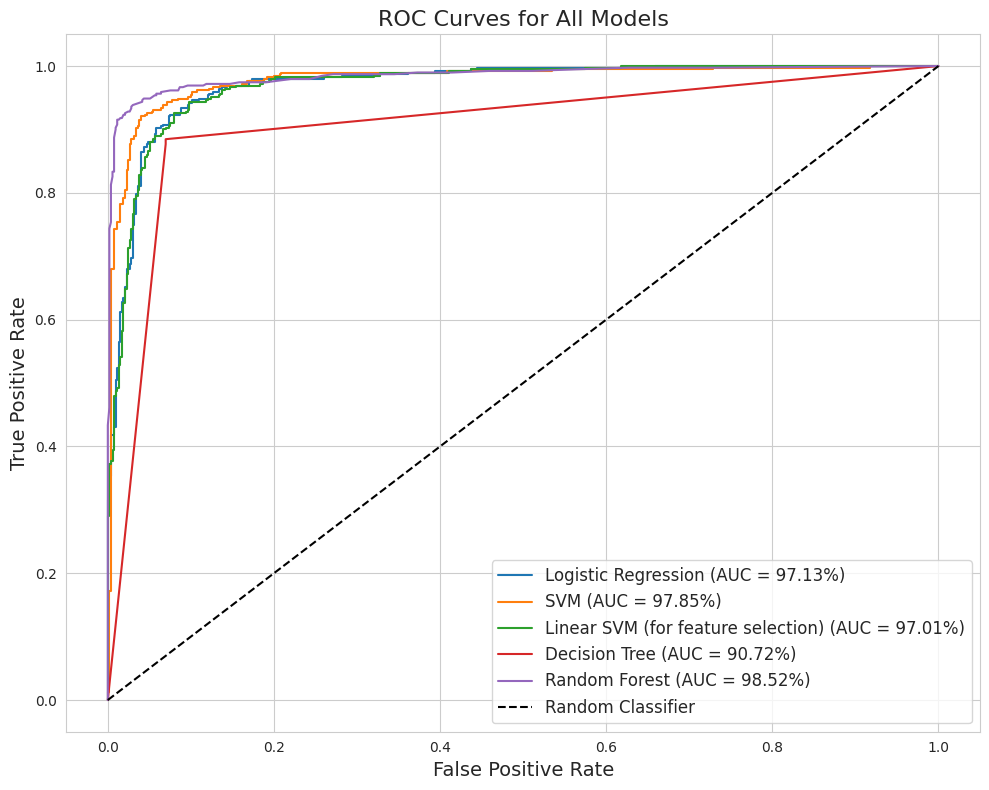

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
        y_probs = (y_probs - y_probs.min()) / (y_probs.max() - y_probs.min())

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc * 100:.2f}%)')

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.title('ROC Curves for All Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. Linear Regression Analysis

In [ ]:
column_names = [f'feature_{i}' for i in range(1, 58)] + ['target_column']
df = pd.read_csv('/content/spambase.data', names=column_names)

X = df.drop(columns=["target_column"])
y = df["target_column"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression linear
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 0.10917012570825022
R^2 Score: 0.5528389753204312


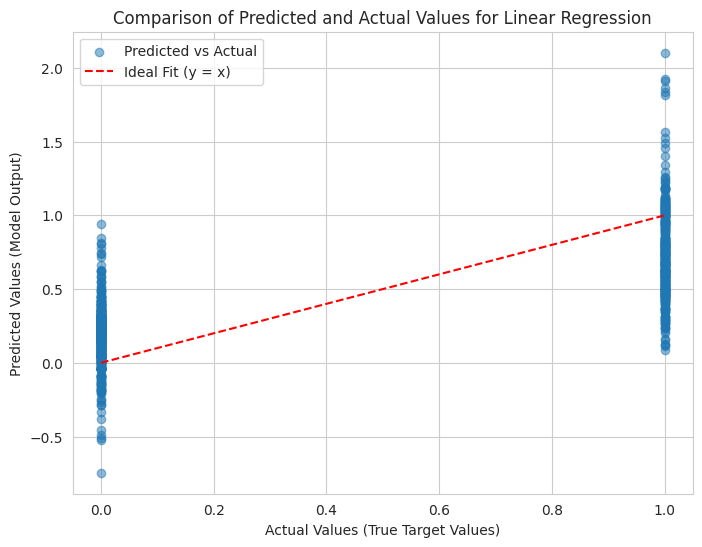

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit (y = x)')
plt.title("Comparison of Predicted and Actual Values for Linear Regression")
plt.xlabel("Actual Values (True Target Values)")
plt.ylabel("Predicted Values (Model Output)")
plt.legend()
plt.grid(True)
plt.show()


# 7. Data Splitting

In [ ]:
# Splitting data into training, validation, and testing sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2760
Validation set size: 920
Test set size: 921


In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 3680
Testing set size: 921


# 8. Data Preprocessing and PCA Analysis

Explained Variance Ratios: [11.56479381  5.73232431]


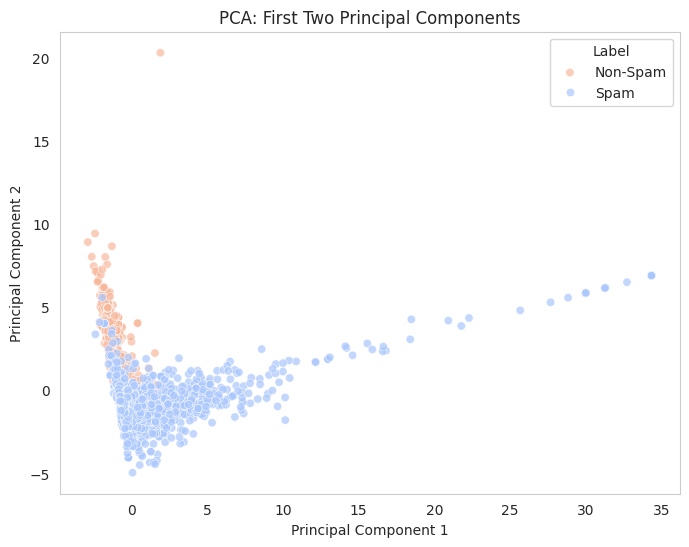

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_ * 100
print(f"Explained Variance Ratios: {explained_variance}")

if sum(explained_variance[:2]) < 80:
    print("Warning: The first two components explain less than 80% of the variance.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label", labels=["Non-Spam", "Spam"])
plt.grid()
plt.show()


# 9. Biplot Visualization of Principal Components

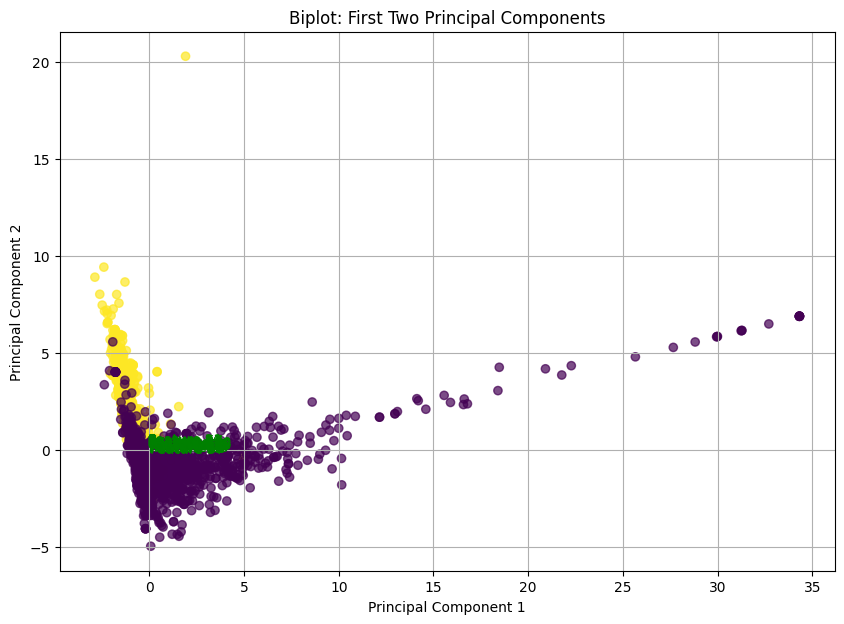

In [ ]:
plt.figure(figsize=(10, 7))
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, f"Feature {i+1}", color='g')
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Biplot: First Two Principal Components")
plt.grid()
plt.show()


# 10. K-Means Clustering: Determining Optimal Number of Clusters

In [ ]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the silhouette score is {silhouette_avg:.2f}")

optimal_k = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters: {optimal_k}")


For k = 2, the silhouette score is 0.89
For k = 3, the silhouette score is 0.50
For k = 4, the silhouette score is 0.56
For k = 5, the silhouette score is 0.46
For k = 6, the silhouette score is 0.43
For k = 7, the silhouette score is 0.42
For k = 8, the silhouette score is 0.43
For k = 9, the silhouette score is 0.44
Optimal number of clusters: 2


#K-Means Clustering Results

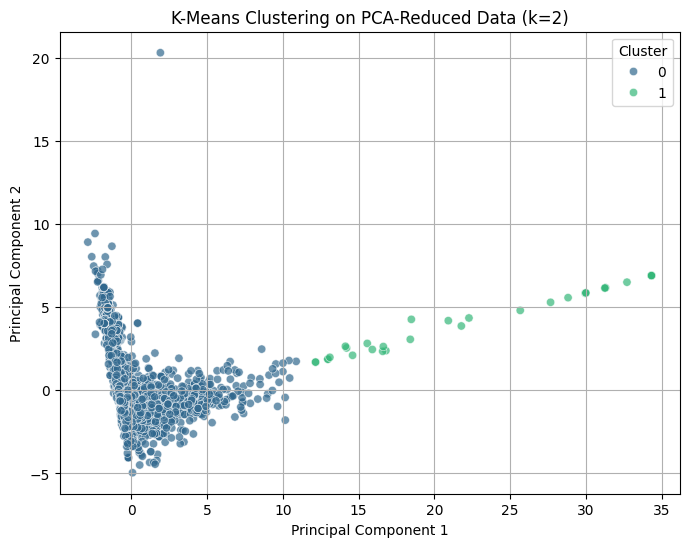

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title(f"K-Means Clustering on PCA-Reduced Data (k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


In [ ]:
print(f"Explained Variance Ratios: {explained_variance}")


Explained Variance Ratios: [11.56479381  5.73232431]


#Top 10 Most Important Features

In [ ]:
# Train Random Forest for Feature Importance
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': column_names[:-1],
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


<ipython-input-23-5642184c9ff4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')


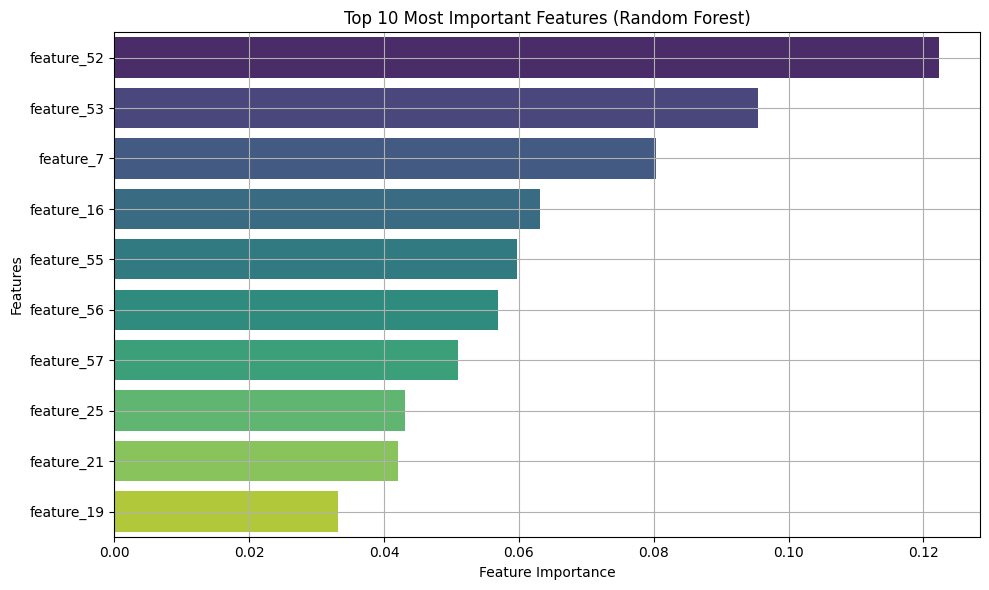

In [ ]:
# Plot top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.grid()
plt.tight_layout()
plt.show()


#Pairplot of top 3 features

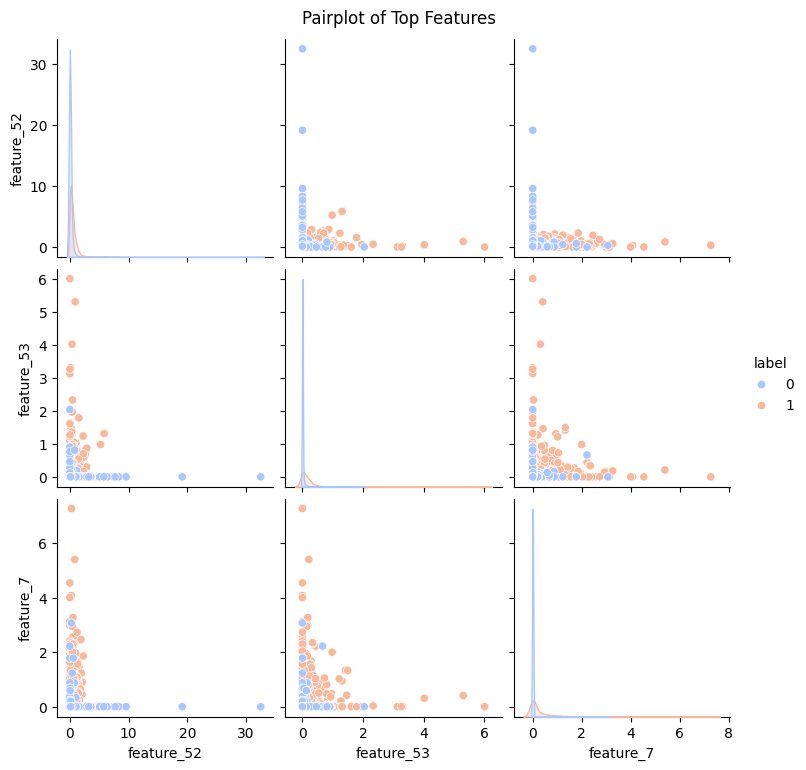

In [ ]:
top_features = feature_importances.head(3)['Feature'].values

sns.pairplot(data=X[top_features].assign(label=y), hue='label', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Top Features", y=1.02)
plt.show()


#Comparison of Classification Metrics Across Models

In [ ]:
# Metrics Comparison Data
metrics_data = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [91.97, 93.49, 95.55, 95.55],
    'Precision': [0.91, 0.92, 0.93, 0.93],
    'Recall': [0.87, 0.89, 0.88, 0.92],
    'F1-Score': [0.89, 0.90, 0.90, 0.92]
}
metrics_df = pd.DataFrame(metrics_data)


In [ ]:
metrics_df['Scaled Accuracy'] = metrics_df['Accuracy'] / 10  # Przeskalowanie
metrics_df[['Scaled Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title("Comparison of Classification Metrics Across Models (Scaled Accuracy)", fontsize=16)
plt.ylabel("Score (Scaled for Accuracy)", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Metrics", fontsize=12)
plt.tight_layout()
plt.show()
